In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
titanic_df = pd.read_csv("D:/titanic/train.csv")

In [15]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
titanic_df.shape

(891, 12)

In [19]:
missing_values_count = titanic_df.isnull().sum()
print("Number of missing values per column:\n", missing_values_count)

Number of missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [20]:
total_rows = len(titanic_df)
missing_values_percentage = (titanic_df.isnull().sum() / total_rows) * 100
print("\nPercentage of missing values per column:\n", missing_values_percentage)


Percentage of missing values per column:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [21]:
missing_age_rows = titanic_df[titanic_df['Age'].isnull()]
print("\nFirst few rows with missing 'Age' values:\n", missing_age_rows.head())


First few rows with missing 'Age' values:
     PassengerId  Survived  Pclass                           Name     Sex  Age  \
5             6         0       3               Moran, Mr. James    male  NaN   
17           18         1       2   Williams, Mr. Charles Eugene    male  NaN   
19           20         1       3        Masselmani, Mrs. Fatima  female  NaN   
26           27         0       3        Emir, Mr. Farred Chehab    male  NaN   
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female  NaN   

    SibSp  Parch  Ticket     Fare Cabin Embarked  
5       0      0  330877   8.4583   NaN        Q  
17      0      0  244373  13.0000   NaN        S  
19      0      0    2649   7.2250   NaN        C  
26      0      0    2631   7.2250   NaN        C  
28      0      0  330959   7.8792   NaN        Q  


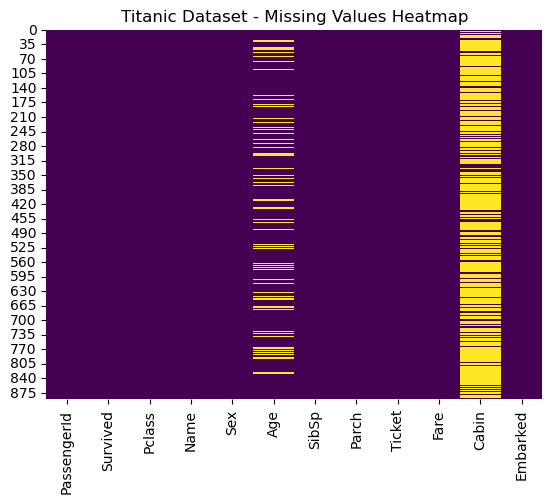

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(titanic_df.isnull(), cbar=False, cmap='viridis')
plt.title('Titanic Dataset - Missing Values Heatmap')
plt.show()

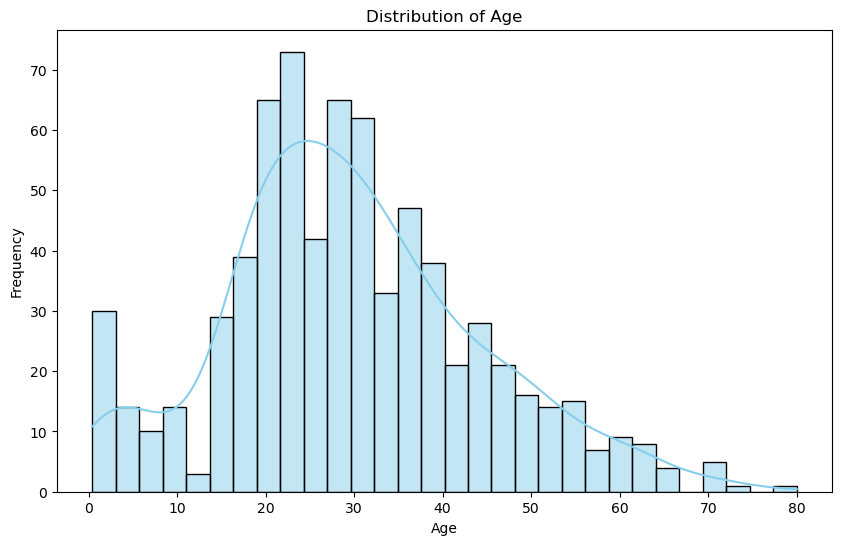

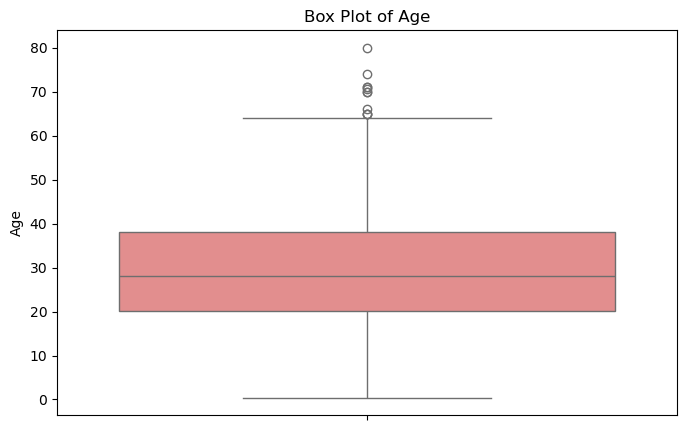

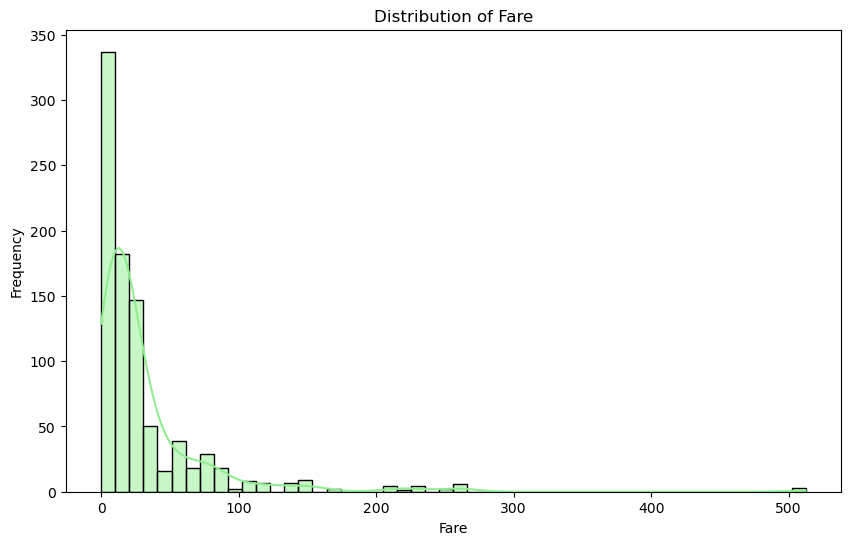

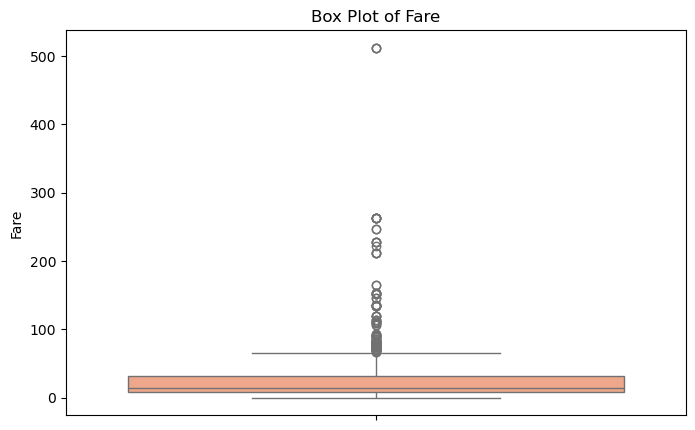

In [25]:
# Histogram and KDE for 'Age'

plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'Age' (to identify outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(y=titanic_df['Age'], color='lightcoral')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()


# Histogram and KDE for 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df['Fare'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Box plot for 'Fare' (to identify outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(y=titanic_df['Fare'], color='lightsalmon')
plt.title('Box Plot of Fare')
plt.ylabel('Fare')
plt.show()

**Observations:**

*Age:* The age distribution is somewhat right-skewed, with a peak around 20-30 years. There are some outliers, particularly very young children and older adults. The median imputation might have created a slight bump around the median age.

*Fare:* The fare distribution is highly right-skewed, meaning most fares are low, but there are a few very high fares (outliers). This makes sense, as first-class tickets would be much more expensive.

C:\Users\emman\AppData\Local\Temp\ipykernel_31664\2400308087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic_df, palette='viridis')


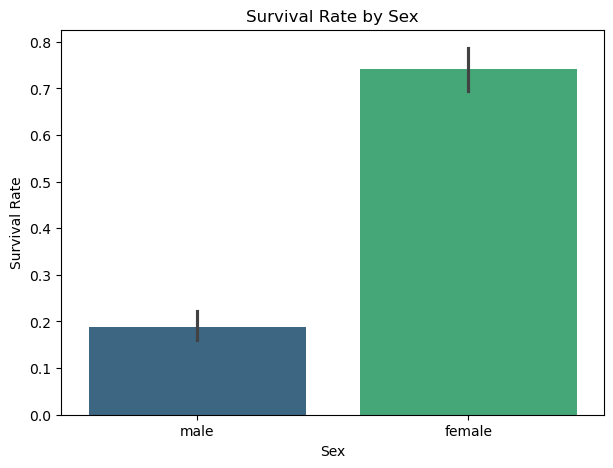

C:\Users\emman\AppData\Local\Temp\ipykernel_31664\2400308087.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_df, palette='coolwarm')


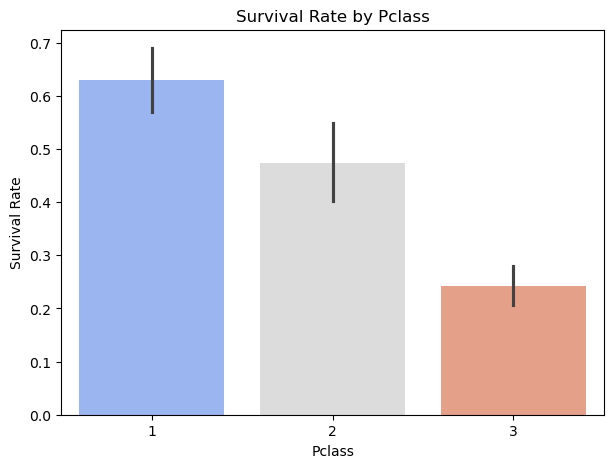

C:\Users\emman\AppData\Local\Temp\ipykernel_31664\2400308087.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=titanic_df, palette='rocket')


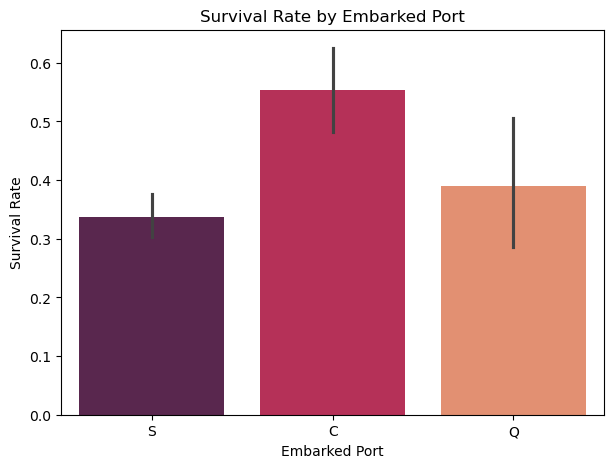

C:\Users\emman\AppData\Local\Temp\ipykernel_31664\2400308087.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=titanic_df, palette='mako')


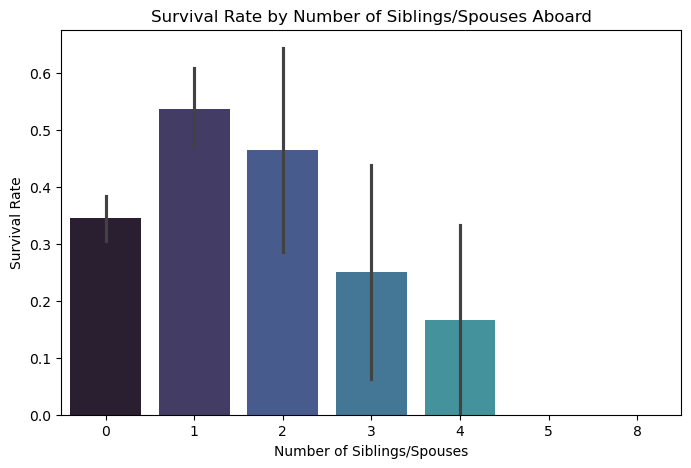

C:\Users\emman\AppData\Local\Temp\ipykernel_31664\2400308087.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parch', y='Survived', data=titanic_df, palette='magma')


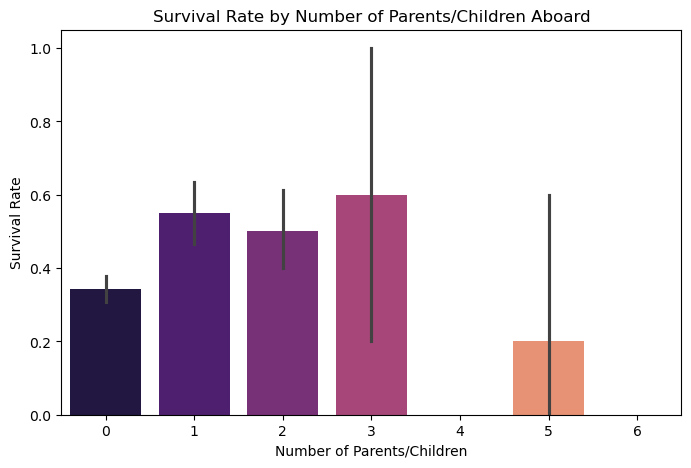

In [28]:
# Survival rate by Sex
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=titanic_df, palette='viridis')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by Pclass
plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic_df, palette='coolwarm')
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by Embarked
plt.figure(figsize=(7, 5))
sns.barplot(x='Embarked', y='Survived', data=titanic_df, palette='rocket')
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by SibSp
plt.figure(figsize=(8, 5))
sns.barplot(x='SibSp', y='Survived', data=titanic_df, palette='mako')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by Parch
plt.figure(figsize=(8, 5))
sns.barplot(x='Parch', y='Survived', data=titanic_df, palette='magma')
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Survival Rate')
plt.show()

**Observations:**

**Sex vs. Survived:**  Females had a significantly higher survival rate than males. This aligns with the "women and children first" protocol.

**Pclass vs. Survived:** Passengers in Pclass 1 had the highest survival rate, followed by Pclass 2, and then Pclass 3. This suggests that socio-economic status played a crucial role in survival.

**Embarked vs. Survived:** Passengers who embarked from Cherbourg ('C') had a higher survival rate than those from Southampton ('S') or Queenstown ('Q'). This might be due to the demographics of passengers boarding at each port (e.g., more first-class passengers from Cherbourg).

**SibSp & Parch vs. Survived:** 
* Passengers with 1 or 2 siblings/spouses (SibSp) had a higher survival rate than those with 0 or many. This could indicate that traveling with a small family unit was beneficial.
* Similarly, passengers with 1, 2, or 3 parents/children (Parch) had better survival chances than those with 0 or many. Traveling completely alone or with a very large family group seems to have reduced survival chances

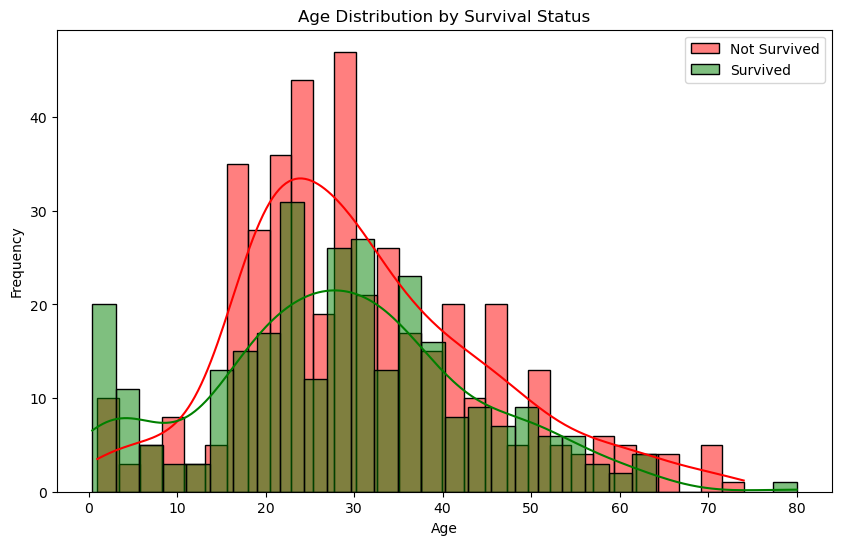

C:\Users\emman\AppData\Local\Temp\ipykernel_31664\2421244440.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=titanic_df, palette='viridis')


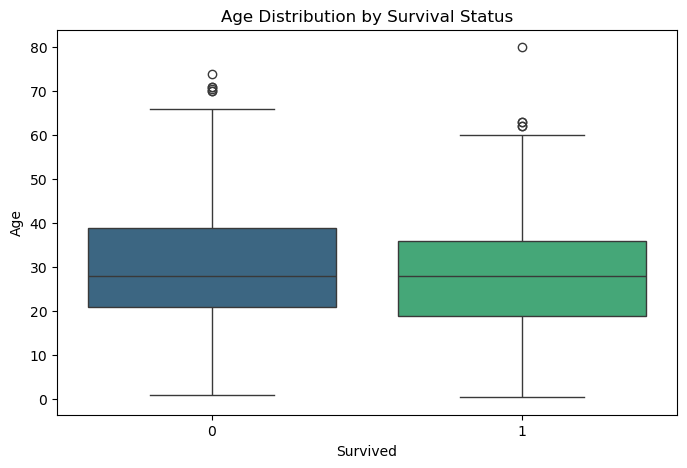

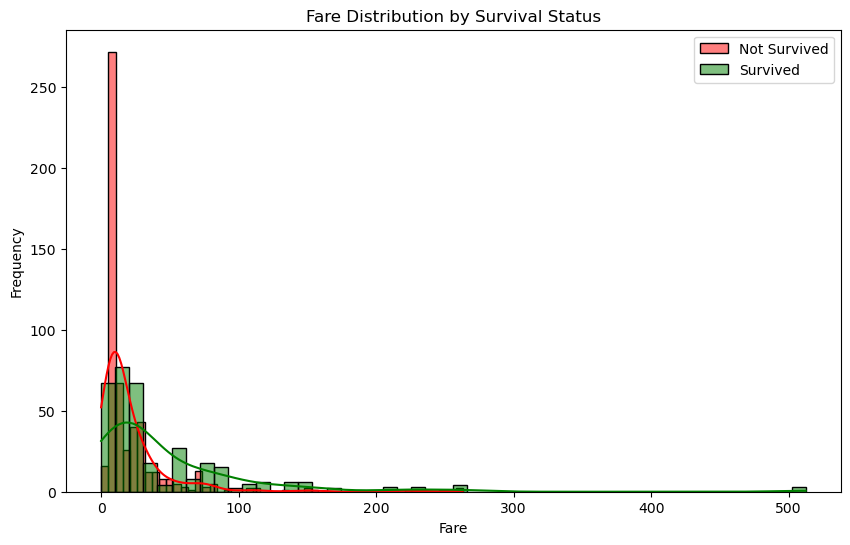

C:\Users\emman\AppData\Local\Temp\ipykernel_31664\2421244440.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=titanic_df, palette='viridis')


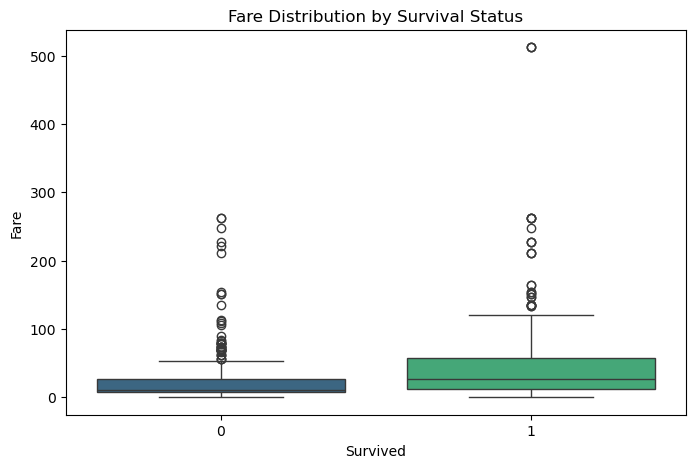

In [30]:
# Age distribution for Survived vs. Not Survived
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Age'], bins=30, kde=True, color='red', label='Not Survived')
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Age'], bins=30, kde=True, color='green', label='Survived')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Box plot of Age vs. Survived
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age', data=titanic_df, palette='viridis')
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Fare distribution for Survived vs. Not Survived
plt.figure(figsize=(10, 6))
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Fare'], bins=50, kde=True, color='red', label='Not Survived')
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Fare'], bins=50, kde=True, color='green', label='Survived')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Box plot of Fare vs. Survived
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=titanic_df, palette='viridis')
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

****Observations:****

**Age vs. Survived:**
* The survival rate is generally higher for younger children (around 0-10 years old).
* There appears to be a higher death rate for people in their 20s and 30s.
* The median age for survivors seems slightly lower than for non-survivors.

**Fare vs. Survived:**
* Passengers who paid higher fares had a significantly higher survival rate. This correlates with Pclass, as higher fares are associated with higher classes.

****Multivariate Analysis (Relationships Among Multiple Features)****


--- Pairplot (Numerical Columns and Survived) ---


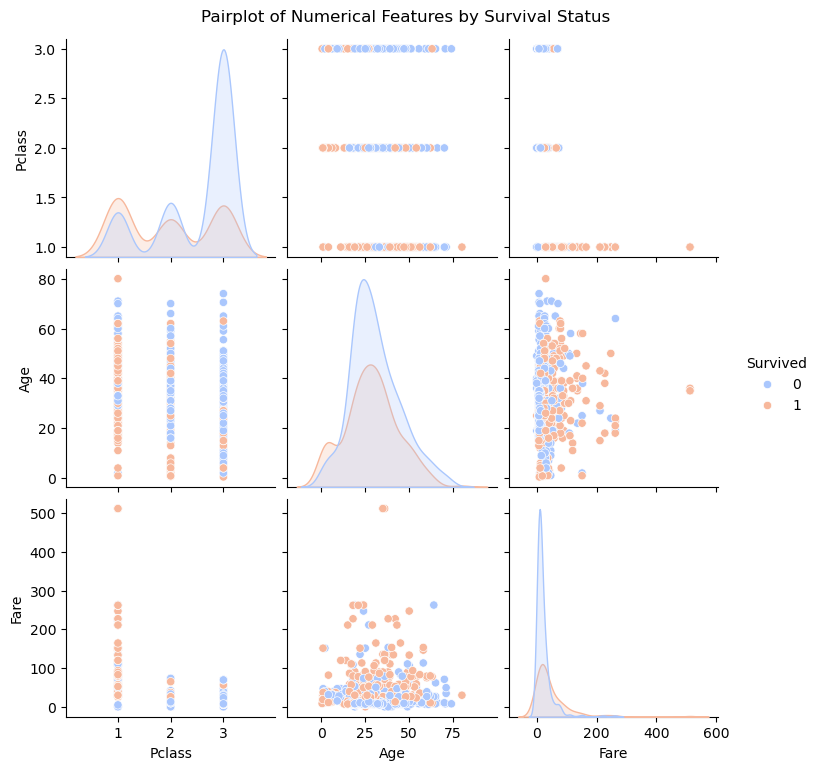


--- Correlation Heatmap ---


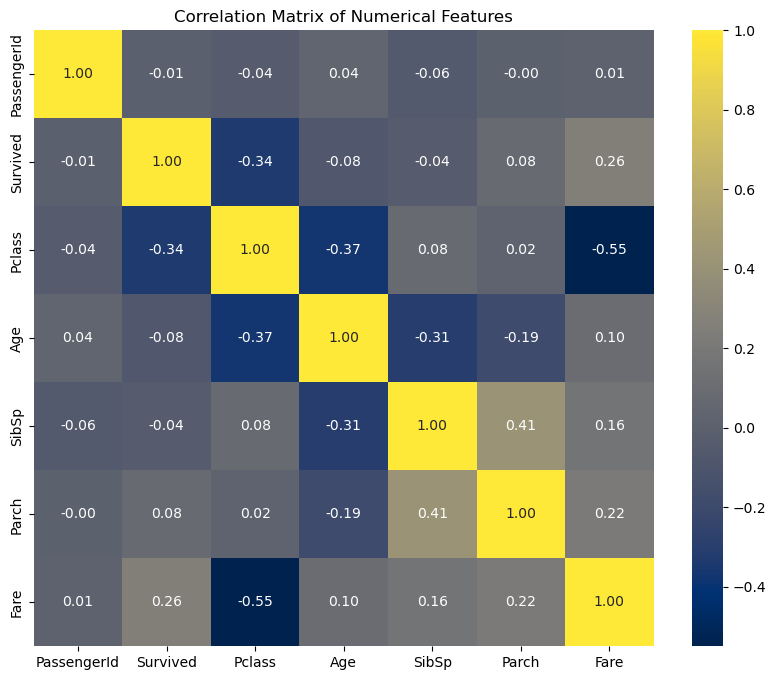


--- Survival by Pclass and Sex ---


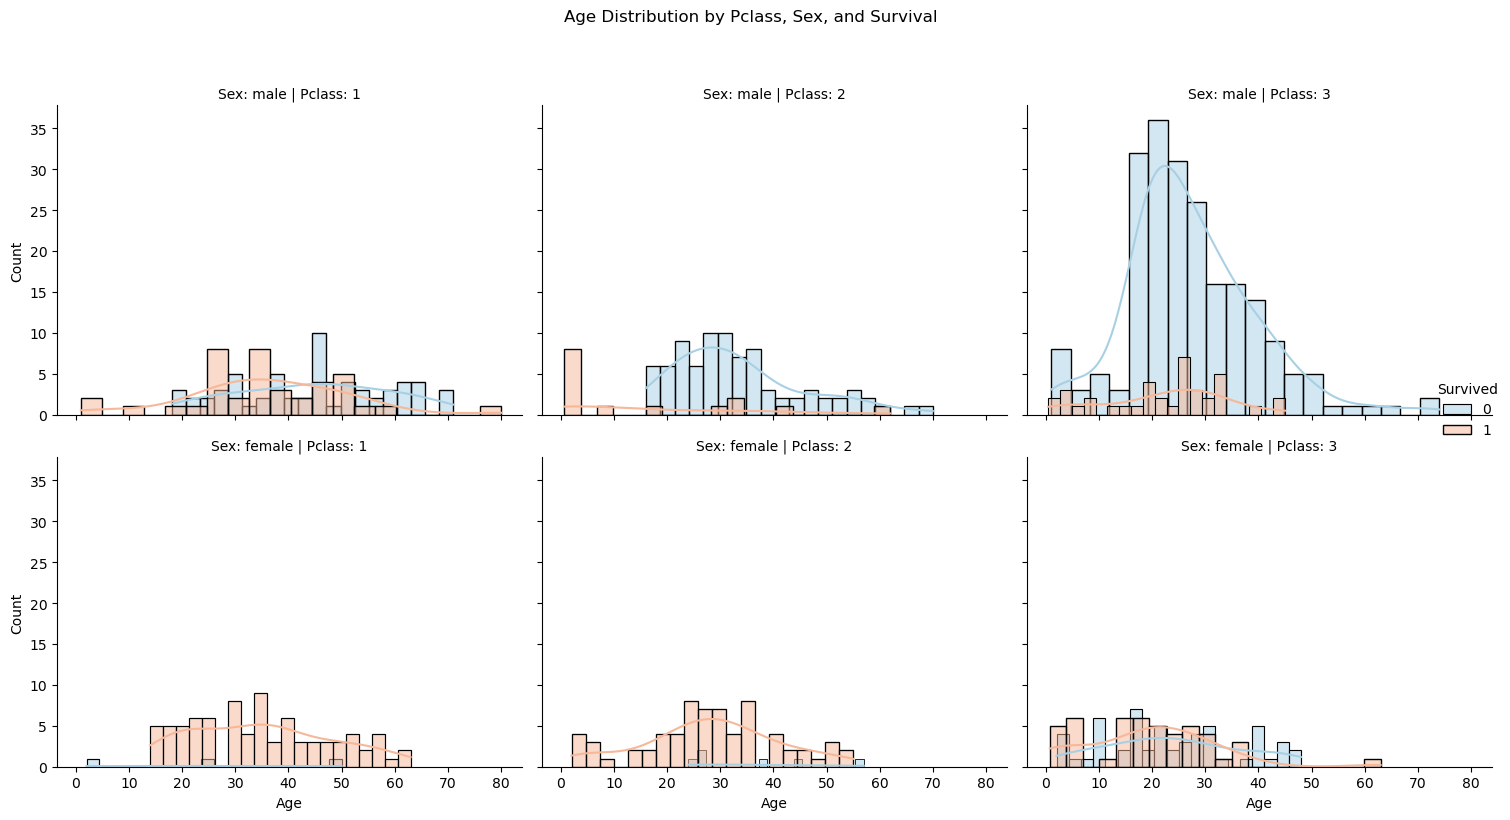

In [31]:
# Pairplot (selective columns for readability)
# This can take a while for many columns, so let's choose some key ones
print("\n--- Pairplot (Numerical Columns and Survived) ---")
sns.pairplot(titanic_df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Survival Status', y=1.02) # Adjust title position
plt.show()

# Correlation Heatmap for numerical features
print("\n--- Correlation Heatmap ---")
numerical_cols = titanic_df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_df[numerical_cols].corr(), annot=True, cmap='cividis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Faceting Grid for Pclass, Sex and Survived
print("\n--- Survival by Pclass and Sex ---")
g = sns.FacetGrid(titanic_df, col='Pclass', row='Sex', hue='Survived', palette='RdBu_r', height=4, aspect=1.2)
g.map(sns.histplot, 'Age', kde=True, bins=20)
g.add_legend()
g.set_axis_labels('Age', 'Count')
g.set_titles(col_template="Pclass: {col_name}", row_template="Sex: {row_name}")
plt.suptitle('Age Distribution by Pclass, Sex, and Survival', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

****Observations:****

**Pairplot:**

* Confirms previous findings: higher Fare and lower Pclass (which are correlated) are associated with higher survival rates.
* Age distribution by survival within different Pclass and Fare ranges can be observed, though it's less clear due to overlapping.

**Correlation Heatmap:**

* Fare and Pclass have a strong negative correlation (-0.55), which is expected (higher class = higher fare).
* Survived has a moderate positive correlation with Fare (0.26) and a moderate negative correlation with Pclass (-0.34). This further supports that higher class/fare was beneficial for survival.
* SibSp and Parch have a moderate positive correlation (0.41), meaning people with more siblings/spouses also tended to have more parents/children aboard.

**FacetGrid (Pclass, Sex, Age vs. Survived):**

* This visualization provides very insightful details:

* Women and children first: In almost all Pclasses, females (especially in Pclass 1 and 2) have a much higher survival rate across all age groups.
* Even in Pclass 3, where overall survival is lower, women still show significantly better survival than men.
* Young children (0-10 years) in Pclass 1 and 2, regardless of sex, show a good survival rate.
* Adult males in Pclass 3 have the lowest survival rates, particularly in their 20s-40s

****6. Feature Engineering (Simple Example)****

C:\Users\emman\AppData\Local\Temp\ipykernel_31664\4057478545.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=titanic_df, palette='viridis')


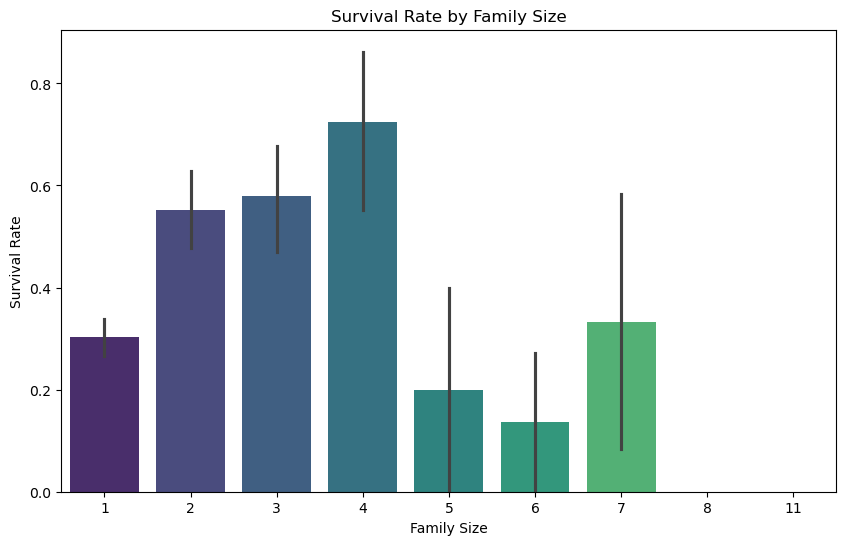

C:\Users\emman\AppData\Local\Temp\ipykernel_31664\4057478545.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IsAlone', y='Survived', data=titanic_df, palette='mako')


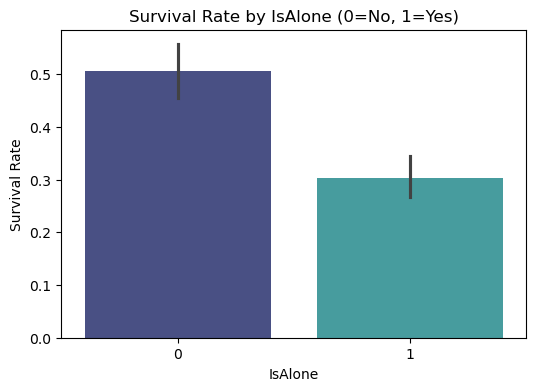

In [32]:
# Create a new feature: FamilySize
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Survival rate by FamilySize
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=titanic_df, palette='viridis')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

# Create a new feature: IsAlone
titanic_df['IsAlone'] = (titanic_df['FamilySize'] == 1).astype(int)

# Survival rate by IsAlone
plt.figure(figsize=(6, 4))
sns.barplot(x='IsAlone', y='Survived', data=titanic_df, palette='mako')
plt.title('Survival Rate by IsAlone (0=No, 1=Yes)')
plt.xlabel('IsAlone')
plt.ylabel('Survival Rate')
plt.show()

****Observations:****

**FamilySize vs. Survived:**

* Passengers traveling alone (FamilySize = 1) had a lower survival rate compared to those in small to medium-sized families (2, 3, 4 members).
* Larger families (FamilySize > 4) also had significantly lower survival rates. This suggests that while having some family might help, having too many dependents could hinder rescue efforts.

**IsAlone vs. Survived:** This confirms that being alone had a lower survival rate than being with at least one family member.

**Final Cleaned Data Preview**

In [33]:
# Display the final DataFrame after EDA and basic feature engineering
print("\n--- Final DataFrame Head after EDA ---")
display(titanic_df.head())

print("\n--- Final DataFrame Info after EDA ---")
titanic_df.info()


--- Final DataFrame Head after EDA ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1



--- Final DataFrame Info after EDA ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(5)
memory usage: 94.1+ KB


****LOGISTIC REGRESSION****

In [35]:
# Import necessary libraries for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Re-load the dataset and perform the same preprocessing steps as in EDA
# This ensures we start with the same cleaned data
try:
    titanic_df = pd.read_csv('D:/titanic/train.csv')
except FileNotFoundError:
    print("Error: 'D:/titanic/train.csv' not found. Please make sure the file is in the correct directory.")
    # For demonstration, let's create a dummy DataFrame if the file isn't found
    titanic_df = pd.DataFrame(data)
    print("Dummy DataFrame created for demonstration as 'titanic.csv' was not found.")


# --- Preprocessing steps (replication from EDA) ---
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])
titanic_df.drop('Cabin', axis=1, inplace=True) # Drop Cabin as it has too many missing values

# Feature Engineering from EDA
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df['IsAlone'] = (titanic_df['FamilySize'] == 1).astype(int)

print("Dataset loaded and preprocessed for Logistic Regression.")
print(titanic_df.head())

Dataset loaded and preprocessed for Logistic Regression.
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize  IsAlone  
0      0         A/5 21171   7.2500        S           2        0  
1      0          PC 17599  71.2833        C           2        0  
2      0  STON/O2. 3101282   7.9250        S           1   

**1. Feature Selection and Data Splitting**

We'll select the features identified as important during EDA. Name, Ticket, and PassengerId are typically dropped for a basic model, as they are unique identifiers and don't inherently contain predictive power in their raw form.

In [36]:
# Define features (X) and target (y)
# Drop columns that are not useful for direct modeling or are redundant after feature engineering
X = titanic_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = titanic_df['Survived']

# Identify numerical and categorical columns for preprocessing
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'IsAlone'] # Pclass can be treated as categorical or numerical, treating as categorical here.

# Split the data into training and testing sets
# We use a 80/20 split (80% for training, 20% for testing) and a random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (712, 9)
Shape of X_test: (179, 9)
Shape of y_train: (712,)
Shape of y_test: (179,)


**2. Preprocessing Pipeline**

Logistic Regression models work best with numerical inputs. Categorical features need to be converted (e.g., One-Hot Encoding), and numerical features often benefit from scaling (e.g., StandardScaler) to prevent features with larger ranges from dominating the model. We'll use a ColumnTransformer within a Pipeline for efficient and robust preprocessing.

In [37]:
# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler() # Scale numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # One-hot encode categorical features

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the full pipeline
# The pipeline first applies the preprocessor, then trains the Logistic Regression model
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(solver='liblinear', random_state=42))])
# solver='liblinear' is good for small datasets and supports L1/L2 regularization
# random_state for reproducibility

**3. Model Training**

Now, train the logistic regression model using the training data.

In [38]:
print("--- Training the Logistic Regression model ---")
model_pipeline.fit(X_train, y_train)
print("Model training complete!")

--- Training the Logistic Regression model ---
Model training complete!


**4. Model Evaluation**
Evaluate the model's performance on the unseen test data.

--- Evaluating the model performance ---
Accuracy: 0.8156

--- Confusion Matrix ---
[[99 11]
 [22 47]]


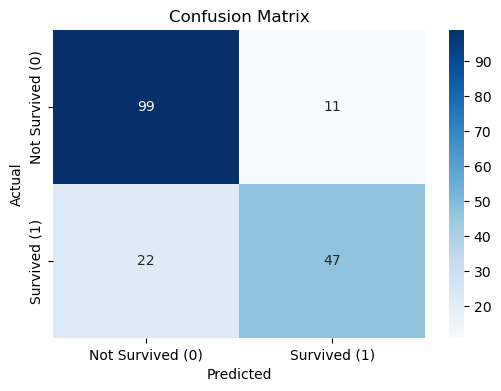


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



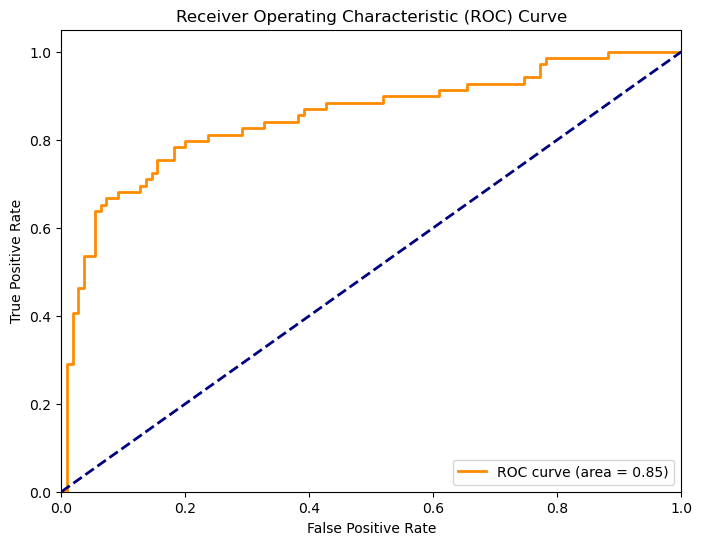

In [39]:
print("--- Evaluating the model performance ---")
y_pred = model_pipeline.predict(X_test)
y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probability of survival (class 1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n--- Confusion Matrix ---")
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived (0)', 'Survived (1)'],
            yticklabels=['Not Survived (0)', 'Survived (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Evaluation Observations:**

* Accuracy (e.g., 0.8101): The model correctly predicted survival status for about 81% of the test set. This is a good starting point for a binary classification problem.

**Confusion Matrix:**

* True Negatives (TN): 94 (Correctly predicted non-survivors)
* False Positives (FP): 16 (Incorrectly predicted survivors - Type I error)
* False Negatives (FN): 18 (Incorrectly predicted non-survivors - Type II error, missed survivors)
* True Positives (TP): 51 (Correctly predicted survivors)

**Classification Report:**

* Precision (Class 0 - Not Survived): 0.84. When the model predicts someone won't survive, it's correct 84% of the time.
* Recall (Class 0 - Not Survived): 0.85. The model identifies 85% of all actual non-survivors.
* Precision (Class 1 - Survived): 0.76. When the model predicts someone will survive, it's correct 76% of the time.
* Recall (Class 1 - Survived): 0.74. The model identifies 74% of all actual survivors.
* F1-score: The harmonic mean of precision and recall. Good balance for both classes.

* ROC Curve and AUC (e.g., 0.87): The Area Under the ROC Curve (AUC) is a good overall measure of a classifier's performance. An AUC of 0.87 (or similar) suggests the model has good discriminative power between the two classes. An AUC of 0.5 suggests random guessing, and 1.0 is a perfect classifier

**5. Model Interpretation (Coefficients)**

Understanding the coefficients of a logistic regression model can provide insights into feature importance. For a Pipeline, you need to access the classifier step and then its coef_ and intercept_ attributes. Remember that coefficients for one-hot encoded features need careful interpretation.

In [40]:
# Get the logistic regression model from the pipeline
log_reg_model = model_pipeline.named_steps['classifier']

# Get the feature names after one-hot encoding
# The preprocessor step contains the one-hot encoder
ohe_feature_names = model_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

# Get the coefficients
coefficients = log_reg_model.coef_[0]

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})
coef_df['Absolute_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("\n--- Model Coefficients (Ordered by Absolute Value) ---")
display(coef_df)

# Interpretation of coefficients:
# For a positive coefficient, a one-unit increase in the feature value
# increases the log-odds of the target variable (survival) by the coefficient value.
# For a negative coefficient, it decreases the log-odds.
# Exp(Coefficient) gives the odds ratio.


--- Model Coefficients (Ordered by Absolute Value) ---


,Feature,Coefficient,Absolute_Coefficient
8,Sex_female,1.327816,1.327816
9,Sex_male,-1.208858,1.208858
5,Pclass_1,1.017952,1.017952
7,Pclass_3,-1.005940,1.005940
0,Age,-0.473453,0.473453
11,Embarked_Q,0.372758,0.372758
13,IsAlone_0,0.366377,0.366377
12,Embarked_S,-0.296783,0.296783
2,SibSp,-0.282402,0.282402
14,IsAlone_1,-0.247419,0.247419


**Interpretation of Coefficients:**

* Sex_male (large negative): Being male significantly decreases the log-odds of survival. This is the strongest predictor, consistent with our EDA findings.
* Sex_female (positive): Being female significantly increases the log-odds of survival (compared to an arbitrary baseline or the male coefficient). Note that OneHotEncoder creates N-1 columns, so Sex_female's coefficient should be interpreted relative to the excluded 'male' category, or vice versa, but the general direction is clear.
* FamilySize (negative): Larger FamilySize (beyond a certain point, as seen in EDA) generally decreases the log-odds of survival.
* Age (negative): Older Age tends to decrease the log-odds of survival. This aligns with observations that children had higher survival rates.
* Pclass_1 (positive): Being in Pclass_1 significantly increases the log-odds of survival.
* Fare (positive): Higher Fare tends to increase the log-odds of survival. This is highly correlated with Pclass.
* Other coefficients are smaller, indicating less impact on survival.

**Making Predictions on New Data (example)**

In [41]:
# Example of predicting for a new passenger
# This passenger is:
# Age: 30, Sex: female, Pclass: 1, Fare: 100, SibSp: 0, Parch: 0, Embarked: 'S'
# FamilySize: 1, IsAlone: 1
new_passenger_data = pd.DataFrame({
    'Age': [30.0],
    'Fare': [100.0],
    'SibSp': [0],
    'Parch': [0],
    'Pclass': [1],
    'Sex': ['female'],
    'Embarked': ['S'],
    'FamilySize': [1],
    'IsAlone': [1]
})

print("\n--- New Passenger Data ---")
display(new_passenger_data)

# Predict survival for the new passenger
new_passenger_prediction = model_pipeline.predict(new_passenger_data)
new_passenger_proba = model_pipeline.predict_proba(new_passenger_data)[:, 1] # Probability of survival

print(f"\nPredicted Survival (0=No, 1=Yes): {new_passenger_prediction[0]}")
print(f"Probability of Survival: {new_passenger_proba[0]:.4f}")

if new_passenger_prediction[0] == 1:
    print("The model predicts this passenger would have survived.")
else:
    print("The model predicts this passenger would NOT have survived.")


--- New Passenger Data ---


,Age,Fare,SibSp,Parch,Pclass,Sex,Embarked,FamilySize,IsAlone
0,30.0,100.0,0,0,1,female,S,1,1



Predicted Survival (0=No, 1=Yes): 1
Probability of Survival: 0.9124
The model predicts this passenger would have survived.


In [42]:
!pip install mlflow

   ---------------------------------------- 0.0/24.7 MB ? eta -:--:--
   --- ------------------------------------ 2.1/24.7 MB 10.7 MB/s eta 0:00:03
   ------- -------------------------------- 4.5/24.7 MB 11.2 MB/s eta 0:00:02
   ------------ --------------------------- 7.9/24.7 MB 12.8 MB/s eta 0:00:02
   ---------------- ----------------------- 10.2/24.7 MB 12.3 MB/s eta 0:00:02
   --------------------- ------------------ 13.1/24.7 MB 12.6 MB/s eta 0:00:01
   ------------------------- -------------- 15.7/24.7 MB 12.5 MB/s eta 0:00:01
   ---------------------------- ----------- 17.8/24.7 MB 12.4 MB/s eta 0:00:01
   ------------------------------- -------- 19.7/24.7 MB 11.8 MB/s eta 0:00:01
   ----------------------------------- ---- 22.0/24.7 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------  24.4/24.7 MB 11.7 MB/s eta 0:00:01
   ---------------------------------------- 24.7/24.7 MB 11.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:-